# Watershed Project - Mapping Floodplain Connectivity in Boulder County
![Watershed Project](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/South_Boulder_Creek_%28Colorado%29.JPG/1920px-South_Boulder_Creek_%28Colorado%29.JPG)

*Img source: 
Wikimedia Foundation. (2022, September 4). South Boulder creek (Colorado). Wikipedia. https://en.wikipedia.org/wiki/South_Boulder_Creek_(Colorado)

## Collaborators and Acknowledgements
Julia Sobczak, Lindsay Chipman, Matthew Bitters, and the [Watershed Center](https://watershed.center/)

Spring project for the University of Colorado Earth Data Analytics program, [Earth Lab](https://www.earthdatascience.org/)

In [1]:
# Import packages
# Make sure you have RiverREM imported, check readme for instructions
import os
import pathlib

import matplotlib.pyplot as plt
from plot_model import plot_model
from plot_site_map import plot_sites, plot_sites_folium
from riverrem.REMMaker import REMMaker, clear_osm_cache
import requests
import rioxarray as rxr

In [2]:
# Set working directory
working_dir = os.path.join(
    pathlib.Path.home(), 'earth-analytics', 'data', 'watershed-project')

# Try/Except Block   
try:
    os.chdir(working_dir)
except:
    print('{} does not exist. Creating...'.format(working_dir))
    os.makedirs(working_dir)
    os.chdir(working_dir)
else:
    print('{} is now the working directory'.format(working_dir))

/Users/lchipman/earth-analytics/data/watershed-project is now the working directory


# Plot Study Sites
The study sites are five streams in the St. Vrain Watershed, Boulder County.

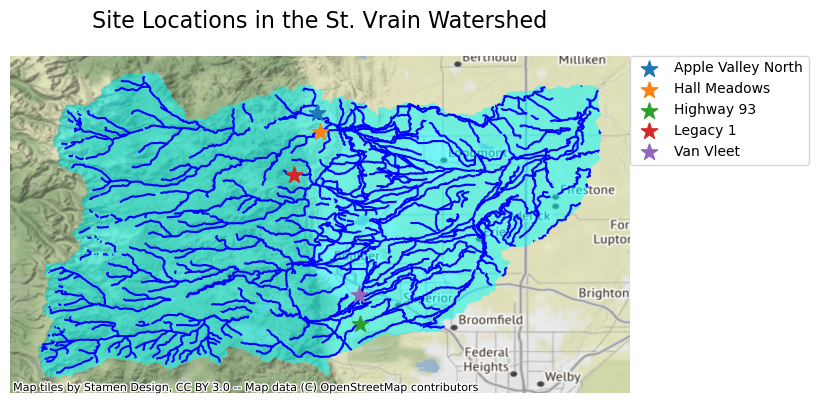

In [3]:
# Plot the study sites, method 1 - find related code in plot_site_map
plot_sites()

In [4]:
# Plot the study sites, method 2 - find related code in plot_site_map
plot_sites_folium()

/Users/lchipman/opt/miniconda3/envs/earth-analytics-py2/lib/python3.10/site-packages/folium/utilities.py:69: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
/Users/lchipman/opt/miniconda3/envs/earth-analytics-py2/lib/python3.10/site-packages/folium/utilities.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if math.isnan(float(coord)):
/Users/lchipman/opt/miniconda3/envs/earth-analytics-py2/lib/python3.10/site-packages/folium/utilities.py:79: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(x) for x in coords]


# Plot DTM of Highway 93 Site 

In [5]:
# Define urls for model data downloads
# Starting with hwy 93, but repeat with new sites as data is added
hwy_93_url = ("https://github.com/lechipman/watershed-project/releases"
              "/download/v1.0.0/DTM_Highway93.tif")

In [6]:
# Function to download and load dtm as data array
def load_dtm(data_url, site_name, file_name):
    """Creates DataArray of Elevation Model Data
    
    Parameters
    ----------
    data_url: str
        Url to the desired data.
    data_name: str
        The name of the data.
        
    Returns
    ---------
    dtm : dataarray
        A dataarray of the elevation model.

    """
    
    override_cache = False
    data_dir = site_name
    data_path = (os.path.join(data_dir, file_name))
    
    # Cache data file
    if not os.path.exists(data_dir):
        print('{} does not exist. Creating...'.format(data_dir))
        os.makedirs(data_dir)

        if (not os.path.exists(data_path)) or override_cache:
            print('{} does not exist. Downloading...'.format(data_path))
            # Download full data file as zipfile
            response = requests.get(data_url)

            # Write in respose content using context manager
            with open(data_path, 'wb') as data_file:
                data_file.write(response.content)
    # Open and plot the DTM
    dtm = rxr.open_rasterio(data_path, masked=True)
              
    return dtm

In [7]:
# Create dataarray for hwy 93 site DTM
dtm = load_dtm(data_url = hwy_93_url, 
                          site_name = 'uav_hwy93',
                          file_name = 'DTM_Highway93.tif')

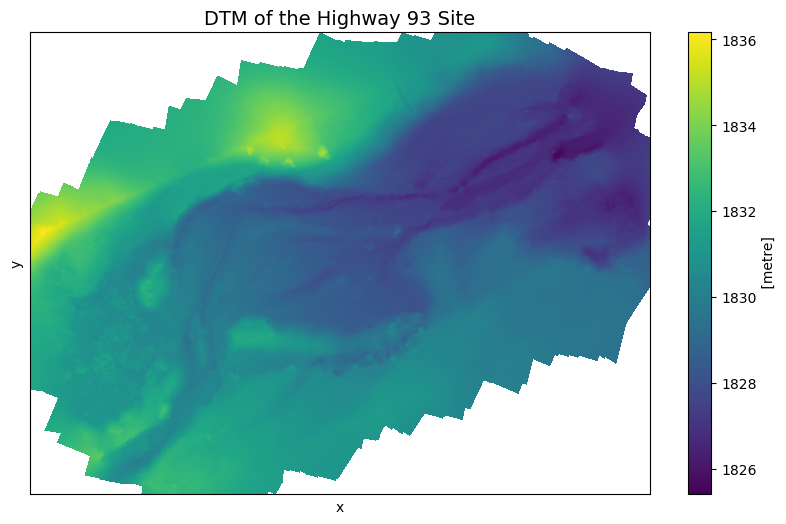

In [8]:
# Plot the hwy 93 DTM
plot_model(model = dtm, 
           title = 'DTM of the Highway 93 Site', 
           coarsen = True)

# Run REMMaker tool using DTM as input

In [11]:
# Run rem_maker without specified centerline
# Input the DEM file path and desired output directory
dtm_dir = 'uav_hwy93'
dtm_path = (os.path.join(dtm_dir, 'DTM_Highway93.tif'))
rem_maker = REMMaker(dem=dtm_path, out_dir=dtm_dir, interp_pts=1000)

# clear OSM cache
clear_osm_cache()

# create an REM
rem_maker.make_rem()

# create an REM visualization with the given colormap
rem_maker.make_rem_viz(cmap='mako_r')

[INFO] 2023-06-29 22:55:48,518 - Getting DEM projection.
[INFO] 2023-06-29 22:55:48,530 - Reading DEM as array.
[INFO] 2023-06-29 22:55:52,338 - Getting DEM bounds.
[INFO] 2023-06-29 22:55:52,345 - Mapping array indices to coordinates.
[INFO] 2023-06-29 22:55:52,434 - Finding river centerline.


Clearing OSM cache.


[INFO] 2023-06-29 22:55:54,808 - Found river(s): Coal Creek
[INFO] 2023-06-29 22:55:54,808 - 
River lengths:
/Users/lchipman/opt/miniconda3/envs/earth-analytics-py2/lib/python3.10/site-packages/riverrem/REMMaker.py:257: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  river_length = river_segments.length.sum()
[INFO] 2023-06-29 22:55:54,867 - 	Coal Creek: 0.0035 degree
[INFO] 2023-06-29 22:55:54,867 - 
Longest river in domain: Coal Creek

[INFO] 2023-06-29 22:55:54,888 - Making river points shapefile.
[INFO] 2023-06-29 22:55:54,952 - Getting river elevation at DEM pixels.
[INFO] 2023-06-29 22:56:02,019 - Interpolating river elevation across DEM extent.
[INFO] 2023-06-29 22:56:02,020 - Estimating k.
[INFO] 2023-06-29 22:56:02,022 - Guessing k = 26
[INFO] 2023-06-29 22:56:02,022 - Using k = 26 nearest neighbors.
[INFO] 2023-06-29 22:56:03,964 - Getting c


Making multidirectional hillshade raster.
Tiling and compressing raster.
Saved ./.cache/DTM_Highway93_hillshade.tif.

Making color relief map with cmap=mako_r.
Tiling and compressing raster.
Saved ./.cache/DTM_Highway93_REM_color-relief.tif.

Generating .png file.
Saved ./.cache/DTM_Highway93_REM_color-relief.png.

Making hillshade-color composite raster.
Tiling and compressing raster.
Saved uav_hwy93/DTM_Highway93_hillshade-color.tif.

Generating .png file.
Saved uav_hwy93/DTM_Highway93_hillshade-color.png.


'uav_hwy93/DTM_Highway93_hillshade-color.tif'

# Plot REM of Highway 93 Site

In [ ]:
# Open and plot the REM you just generated
rem_path = os.path.join(dtm_dir, 'DTM_Highway93_REM.tif')
rem = rxr.open_rasterio(rem_path, masked=True)

plot_model(model = rem, 
           title = 'REM derived from UAV Imagery', 
           coarsen = True)

# REM Histogram¶

In [ ]:
# Create REM histogram plot 
fig, ax = plt.subplots(figsize=(10, 6))
rem.plot.hist(color="cyan", bins=20)
ax.set_title("Histogram of the REM Data")
plt.show()